# Online Retail II Dataset

### Problem Statement: -

###### (A) In order to maintain a good CRM (Customer Relationship Management), a company should be aware of each customer’s attitude towards the company. The company should know the answers to the following questions:
        1.	when did the customer last purchased? (Recency)
        2.	how often does the customer purchase? (Frequency)
        3.	how much money did the customer spend? (Monetary)
##### (B)  Market Basket Analysis (Support, Lift, Confidence) with the help of association rules helps to find out which item will also be picked along the the previously purchsed item ( A consequent is an item found in combination with the antecedent) 

### Data Set Information: -

    This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2010 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

### Attribute Information: -

    1. InvoiceNo: Invoice number. A 6-digit number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
    2. StockCode: Product (item) code. A 5-digit number uniquely assigned to each distinct product.
    3. Description: Product (item) name. Name of the item
    4. Quantity: The quantities of each product (item) per transaction. Numeric.
    5. InvoiceDate: Invoice date and time. The day and time when a transaction was generated.
    6. UnitPrice: Unit price. Product price per unit in sterling (Â£).
    7. CustomerID: Customer number. A 5-digit number uniquely assigned to each customer.
    8. Country: Country name. The name of the country where a customer resides.

## Importing useful libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_excel("D:\\Praxis-2022 (Kol)\\Datasets\\online_retail_II.xlsx", sheet_name="Year 2010-2011")
dfm = pd.read_excel("D:\\Praxis-2022 (Kol)\\Datasets\\online_retail_II.xlsx", sheet_name="Year 2010-2011")

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.shape

(541910, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.nunique()

Invoice        25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
Price           1630
Customer ID     4372
Country           38
dtype: int64

In [9]:
df["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8558
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

From the above result it seems that, Maximum sales happen in United Kingdom whereas least sales in Saudi Arabia. But still EDA need to perform on this.

In [10]:
df.isna().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

We will be dealing the null values later.

In [11]:
df.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Feature Engineering

In [12]:
df["Total_price"] = df["Quantity"]*df["Price"]

Total Price named feature is added.

In [13]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [14]:
df["Total_price"].sum()

9747765.934

In [15]:
df["date_hour"] = df["InvoiceDate"].apply(lambda x:str(x).split(" "))

In [16]:
df.head(1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price,date_hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,"[2010-12-01, 08:26:00]"


In [17]:
df[["Date", "Hour"]] = pd.DataFrame(df["date_hour"].tolist(), index = df.index)
df.head(1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price,date_hour,Date,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00


In [18]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
Total_price           float64
date_hour              object
Date                   object
Hour                   object
dtype: object

In [19]:
df["Date"] = pd.to_datetime(df["Date"])

In [20]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
Total_price           float64
date_hour              object
Date           datetime64[ns]
Hour                   object
dtype: object

In [21]:
df.drop(["date_hour"], axis=1).head(1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price,Date,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010-12-01,08:26:00


In [22]:
df["Year"] = df["InvoiceDate"].dt.year

In [23]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price,date_hour,Date,Hour,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010


## Exploratory Data Analysis (EDA)

In [25]:
#df["Price"].sort_values(ascending = False)
df.sort_values(by='Price', ascending=False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price,date_hour,Date,Hour,Year
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00,"[2011-06-10, 15:31:00]",2011-06-10,15:31:00,2011
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,-17836.46,"[2011-12-05, 11:36:00]",2011-12-05,11:36:00,2011
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,-16888.02,"[2011-01-05, 09:55:00]",2011-01-05,09:55:00,2011
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,-16453.71,"[2011-01-05, 09:57:00]",2011-01-05,09:57:00,2011
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,-13541.33,"[2010-12-07, 15:49:00]",2010-12-07,15:49:00,2010


Sorting with the most expensive products. C556445 Invoice number contains most expensive products.

In [27]:
df.groupby("Description").agg({"Quantity": lambda x: x.sum()}).sort_values("Quantity", ascending=False).head(10)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039
WHITE HANGING HEART T-LIGHT HOLDER,35317
RABBIT NIGHT LIGHT,30680
MINI PAINT SET VINTAGE,26437
PACK OF 12 LONDON TISSUES,26315


Given above are the top 10 purchased items.

In [24]:
df["StockCode"].nunique()

4070

In [25]:
df["Description"].nunique()

4223

The values were expected to be equal, so there must be more than one unique value in Description variable for one unique StockCode. let's check each StockCode value with the corresponding Description values, get every StockCode that has more than one unique Description in a list form:

In [26]:
df.groupby('StockCode').agg({'Description': "nunique"})

,Description
StockCode,
10002,1
10080,2
10120,1
10125,1
10133,2
...,...
gift_0001_20,2
gift_0001_30,1
gift_0001_40,1


From the above analysis, It is clearly seen that single StockCode has multiple descricptions. This means that there are duplicacy in the description variable.

In [27]:
df.loc[df['StockCode'] == 10133, 'Description'].unique() 

array(['COLOURING PENCILS BROWN TUBE', 'damaged'], dtype=object)

StockCode 10133 has two description as shown. Duplicacy has occured may be due to manual entry of the product.

#### Grouping countries by total amount of sales

In [28]:
country_wise_purchase = df.groupby("Country")["Quantity"].sum().sort_values(ascending=False)
country_wise_purchase

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110481
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


<AxesSubplot:xlabel='Country'>

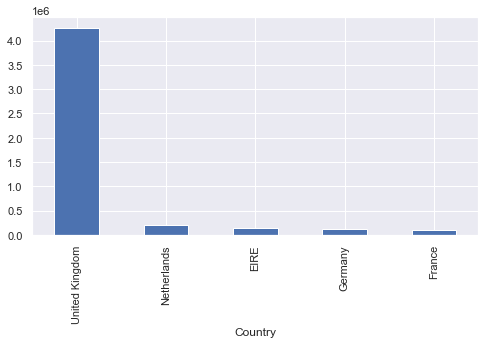

In [35]:
sns.set(rc={"figure.figsize":(8,4)})
country_wise_purchase[:5].plot.bar()

Top 5 countries with high number of purchase. UK has the huge sale.

<AxesSubplot:xlabel='Country'>

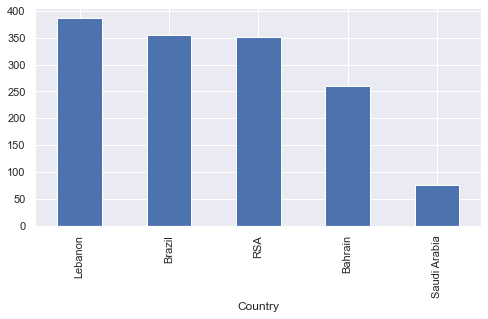

In [30]:
country_wise_purchase[33:].plot.bar()

Least 5 countries with low number of purchase. Saudi Arabia has the lowest sale among all.

#### Which year has the maximum number of sales?

In [36]:
year_wise_purchase = df.groupby("Year")["Total_price"].sum()

<AxesSubplot:title={'center':'Year wise Purchase'}, xlabel='Year'>

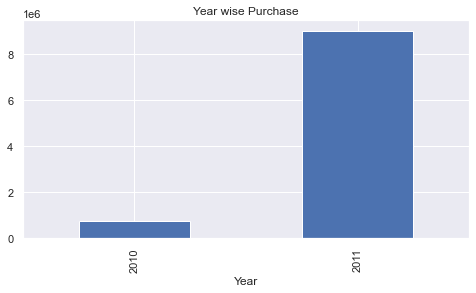

In [37]:
year_wise_purchase.plot.bar(title = "Year wise Purchase")

There's a huge sales happening in the 2011 when compared to 2010. Why is it so??

In [38]:
df["Month"] = df["InvoiceDate"].dt.month

In [39]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price,date_hour,Date,Hour,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12


<AxesSubplot:xlabel='Month,Year'>

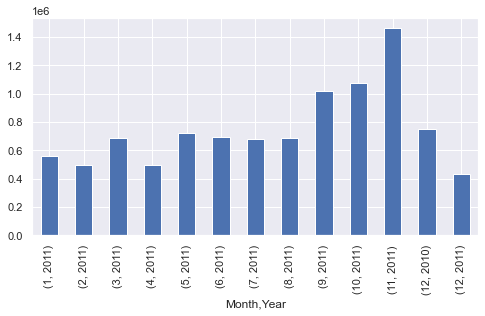

In [40]:
month_year_purchase = df.groupby(["Month", "Year"])["Total_price"].sum()
month_year_purchase.plot.bar()

From the above result, We can see that, There is only 1 month i.e. December month entry in 2010. This is the reason why in 2010, there is a huge gap in the sales as compared to 2011.

#### Why there is a drop in Dec-2011 compared to Nov-2011? Let's find out?

In [47]:
fetch_2011 = df[(df["Year"] == 2011)]
fetch_2011.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price,date_hour,Date,Hour,Year,Month
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1


In [48]:
fetch_2011.shape

(499429, 14)

In 2011, there were 4,99,429 entries.

In [50]:
fetch_2010 = df[(df["Year"] == 2010)]
fetch_2010.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price,date_hour,Date,Hour,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12


In [51]:
fetch_2010.shape

(42481, 14)

In 2010, there were 42,481 entries.

Now, Let's check for December'2011 month.

In [52]:
Dec_2011 = fetch_2011[(df["Month"] == 12)]
Dec_2011 = Dec_2011["InvoiceDate"].dt.date.unique()
Dec_2011

array([datetime.date(2011, 12, 1), datetime.date(2011, 12, 2),
       datetime.date(2011, 12, 4), datetime.date(2011, 12, 5),
       datetime.date(2011, 12, 6), datetime.date(2011, 12, 7),
       datetime.date(2011, 12, 8), datetime.date(2011, 12, 9)],
      dtype=object)

So, There are only 8 entries in December-2011 i.e. upto 9th December 2011. This the reason for the drop.

In [54]:
(df.isnull().sum()/len(df))*100

Invoice         0.000000
StockCode       0.000000
Description     0.268310
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    24.926648
Country         0.000000
Total_price     0.000000
date_hour       0.000000
Date            0.000000
Hour            0.000000
Year            0.000000
Month           0.000000
dtype: float64

Here, there are 0.27% and 24.9% missing values in Description and CustomerID. So, Lets drop it because we need CustomerID for further analysis.

In [55]:
df.dropna(inplace=True)

In [56]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Total_price    0
date_hour      0
Date           0
Hour           0
Year           0
Month          0
dtype: int64

Removed all the missing value

In [57]:
df.shape

(406830, 14)

#### Which country has maximum customer?

In [59]:
country_wise_customer = df.groupby("Country")["Customer ID"].count().sort_values(ascending=False)
country_wise_customer

Country
United Kingdom          361878
Germany                   9495
France                    8492
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


Here, again UK has the maximum number of customer followed by Germany, France.

<AxesSubplot:title={'center':'Most Customers in Country'}, xlabel='Country'>

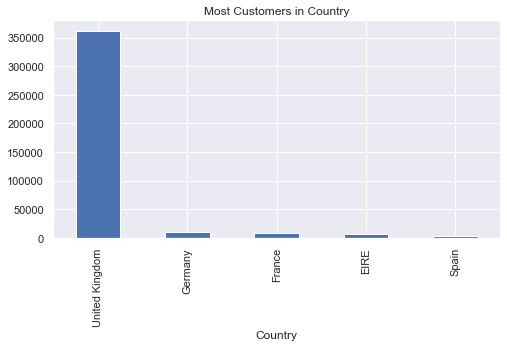

In [60]:
country_wise_customer[:5].plot.bar(title = "Most Customers in Country")

Top 5 countries with most customer.

<AxesSubplot:title={'center':'Least Customers in Country'}, xlabel='Country'>

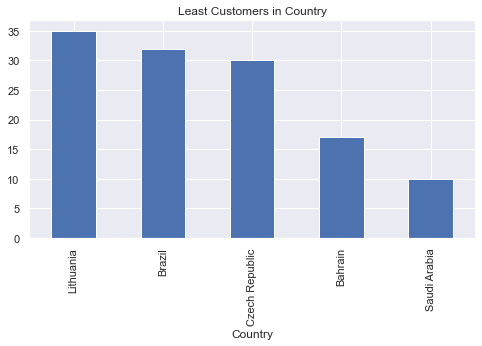

In [61]:
country_wise_customer[-5:].plot.bar(title = "Least Customers in Country")

Least 5 countries with low number of customer.

In [62]:
month_active_cus = df.groupby("Month")["Customer ID"].nunique().reset_index()
month_active_cus

,Month,Customer ID
0,1,783
1,2,798
2,3,1020
3,4,899
4,5,1079
5,6,1051
6,7,993
7,8,980
8,9,1302
9,10,1425


Above is the result of monthly active customer. Maximum number of customer are in the month of September, October & November. It may be due to the festive month.

## RFM Analysis

In [63]:
df.describe()

,Quantity,Price,Customer ID,Total_price,Year,Month
count,406830.000000,406830.000000,406830.000000,406830.000000,406830.000000,406830.000000
mean,12.061276,3.460507,15287.684160,20.401848,2010.934002,7.605958
std,248.693065,69.315080,1713.603074,427.591192,0.248279,3.418945
min,-80995.000000,0.000000,12346.000000,-168469.600000,2010.000000,1.000000
25%,2.000000,1.250000,13953.000000,4.200000,2011.000000,5.000000
50%,5.000000,1.950000,15152.000000,11.100000,2011.000000,8.000000
75%,12.000000,3.750000,16791.000000,19.500000,2011.000000,11.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,2011.000000,12.000000


There are negative values on Quantity variable, this is caused by the refund invoices (Invoices containing the letter "C"), reassign df without refund invoices

In [64]:
df = df[~df["Invoice"].str.contains("C", na=False)]

In [65]:
df.describe()

,Quantity,Price,Customer ID,Total_price,Year,Month
count,397925.000000,397925.000000,397925.000000,397925.000000,397925.000000,397925.000000
mean,13.021793,3.116212,15294.308601,22.394737,2010.934259,7.612548
std,180.419984,22.096773,1713.172738,309.055200,0.247829,3.416529
min,1.000000,0.000000,12346.000000,0.000000,2010.000000,1.000000
25%,2.000000,1.250000,13969.000000,4.680000,2011.000000,5.000000
50%,6.000000,1.950000,15159.000000,11.800000,2011.000000,8.000000
75%,12.000000,3.750000,16795.000000,19.800000,2011.000000,11.000000
max,80995.000000,8142.750000,18287.000000,168469.600000,2011.000000,12.000000


Total number of refund invoices were 8905. So, I have excluded it.

In [66]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

Last date of invoice is 09-Dec-2011

In [67]:
df["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

First date of invoice is 01-Dec-2010

Now, assigning "Today's date" as 5 days after the last date of purchase to make sure that none of the Recency values become zero.

In [68]:
today_date = df['InvoiceDate'].max() + dt.timedelta(days=5)
today_date

Timestamp('2011-12-14 12:50:00')

Now creating a new dataframe called RFM in order to calculate Recency, Frequency and Monetary values.

    1. The number of days between today_date and the last purchase date of this customer is Recency
    2. The number of unique invoices of this customer is Frequency
    3. The sum of TotalPrice is this customer's Monetary

In [70]:
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                    'Invoice': lambda inv: inv.nunique(),
                                    'Total_price': lambda Price: Price.sum()})

In [71]:
rfm.head(5)

,InvoiceDate,Invoice,Total_price
Customer ID,,,
12346.0,330,1,77183.60
12347.0,6,7,4310.00
12348.0,79,4,1797.24
12349.0,23,1,1757.55
12350.0,314,1,334.40


Now, renaming the column as Recency, Frequency & Monetary

In [72]:
rfm.columns = ["Recency", "Frequency", "Monetary"]

In [73]:
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,330,1,77183.60
12347.0,6,7,4310.00
12348.0,79,4,1797.24
12349.0,23,1,1757.55
12350.0,314,1,334.40


In [74]:
rfm.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,96.518322,4.271952,2053.797166
std,100.009747,7.705493,8988.247836
min,5.000000,1.000000,0.000000
25%,22.000000,1.000000,307.245000
50%,55.000000,2.000000,674.450000
75%,146.000000,5.000000,1661.640000
max,378.000000,210.000000,280206.020000


### Defining RFM Scores

1. The min number of Recency metric means that this customer has just purchased, so the highest score (5) should be given to the lower number of Recency.
2. The max number of Frequency and Monetary metrics mean that the customer is purchasing frequently and spending more money, so the highest score (5) should be given to the highest Frequency and Monetary values.

In [75]:
rfm["Recency_Score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["Frequency_Score"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["Monetary_Score"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

Here, the ranking method is done

In [76]:
rfm["RFM_SCORE"] = (rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) + rfm['Monetary_Score'].astype(str))

In [77]:
rfm.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE
Customer ID,,,,,,,
12346.0,330,1,77183.60,1,1,5,115
12347.0,6,7,4310.00,5,5,5,555
12348.0,79,4,1797.24,2,4,4,244
12349.0,23,1,1757.55,4,1,4,414
12350.0,314,1,334.40,1,1,2,112


In [78]:
rfm[rfm["RFM_SCORE"] == "555"].head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE
Customer ID,,,,,,,
12347.0,6,7,4310.00,5,5,5,555
12362.0,7,10,5226.23,5,5,5,555
12417.0,7,9,3649.10,5,5,5,555
12433.0,5,7,13375.87,5,5,5,555
12437.0,6,18,4951.41,5,5,5,555


Customer who has highest score is displayed above. It means that this person has purchased recently and spent more money. He is also a frquent buyer.

#### Naming the RFM scores according to the famous RFM graphic

In [79]:
mapping = {r'[1-2][1-2]': 'Hibernating', r'[1-2][3-4]': 'At_Risk', r'[1-2]5': 'Cant_Loose', r'3[1-2]': 'About_to_Sleep',
           r'33': 'Need_Attention', r'[3-4][4-5]': 'Loyal_Customers', r'41': 'Promising', r'51': 'New_Customers', 
           r'[4-5][2-3]': 'Potential_Loyalists', r'5[4-5]': 'Champions'}

In [80]:
mapping

{'[1-2][1-2]': 'Hibernating',
 '[1-2][3-4]': 'At_Risk',
 '[1-2]5': 'Cant_Loose',
 '3[1-2]': 'About_to_Sleep',
 '33': 'Need_Attention',
 '[3-4][4-5]': 'Loyal_Customers',
 '41': 'Promising',
 '51': 'New_Customers',
 '[4-5][2-3]': 'Potential_Loyalists',
 '5[4-5]': 'Champions'}

We will be using Recency and Frequency scores for customer segmentation. We are assuming that a customer who has recently purchased and who is often purchasing should have high RFM scores.

In [81]:
rfm['SEGMENT'] = rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,SEGMENT
Customer ID,,,,,,,,
12346.0,330,1,77183.60,1,1,5,115,11
12347.0,6,7,4310.00,5,5,5,555,55
12348.0,79,4,1797.24,2,4,4,244,24
12349.0,23,1,1757.55,4,1,4,414,41
12350.0,314,1,334.40,1,1,2,112,11


Coverting the segment scores into category names

In [82]:
rfm['SEGMENT'] = rfm['SEGMENT'].replace(mapping, regex=True)
rfm.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,SEGMENT
Customer ID,,,,,,,,
12346.0,330,1,77183.60,1,1,5,115,Hibernating
12347.0,6,7,4310.00,5,5,5,555,Champions
12348.0,79,4,1797.24,2,4,4,244,At_Risk
12349.0,23,1,1757.55,4,1,4,414,Promising
12350.0,314,1,334.40,1,1,2,112,Hibernating


In [84]:
rfm["SEGMENT"].value_counts()

Hibernating            1065
Loyal_Customers         827
Champions               633
At_Risk                 580
Potential_Loyalists     492
About_to_Sleep          351
Need_Attention          186
Promising               100
Cant_Loose               63
New_Customers            42
Name: SEGMENT, dtype: int64

Most of the customers are hibernating while very few of them are New customer.

Now that we have all the scores for the customers and we have been able to categorize them into 10 groups. Now, it's time to look forward, which segment need high focus or better customer relationship.

In [85]:
rfm[["SEGMENT", "Recency", "Frequency", "Monetary"]].groupby("SEGMENT").agg(["mean", "count"])

Recency        Frequency           Monetary      
                           mean count       mean count         mean count
SEGMENT                                                                  
About_to_Sleep        57.504274   351   1.162393   351   461.061510   351
At_Risk              159.062069   580   2.865517   580  1076.506433   580
Cant_Loose           136.428571    63   8.380952    63  2796.155873    63
Champions              9.876777   633  12.417062   633  6857.963918   633
Hibernating          221.897653  1065   1.101408  1065   487.707579  1065
Loyal_Customers       37.469166   827   6.458283   827  2856.720328   827
Need_Attention        57.064516   186   2.327957   186   889.226398   186
New_Customers         10.857143    42   1.000000    42   388.212857    42
Potential_Loyalists   21.123984   492   2.010163   492  1034.905467   492
Promising             27.350000   100   1.000000   100   351.797800   100

Take a closer look at the customers that need attention:

In [86]:
rfm[rfm["SEGMENT"] == "Need_Attention"].head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,SEGMENT
Customer ID,,,,,,,,
12360.0,56,3,2662.06,3,3,5,335,Need_Attention
12372.0,76,3,1298.04,3,3,4,334,Need_Attention
12413.0,71,3,758.10,3,3,3,333,Need_Attention
12456.0,48,3,3181.04,3,3,5,335,Need_Attention
12536.0,47,3,12601.83,3,3,5,335,Need_Attention


We can implement some policy so that these customers can also get better relationship with the store.

In [87]:
(rfm["SEGMENT"].value_counts()/len(rfm["SEGMENT"]))*100

Hibernating            24.544826
Loyal_Customers        19.059691
Champions              14.588615
At_Risk                13.367135
Potential_Loyalists    11.339018
About_to_Sleep          8.089422
Need_Attention          4.286702
Promising               2.304678
Cant_Loose              1.451947
New_Customers           0.967965
Name: SEGMENT, dtype: float64

In [90]:
marketing_df['Cant_Loose'] = marketing_df['Cant_Loose'].astype(int)
marketing_df.head()

,Cant_Loose
0,12643
1,12853
2,12868
3,12947
4,12980


## Market Basket Analysis

In [71]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [91]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [92]:
dfm['Description'] = dfm['Description'].str.strip()
dfm.dropna(axis=0, subset=['Invoice'], inplace=True)
dfm = dfm[~dfm["Invoice"].str.contains("C", na=False)]

Here, I have removed the spaces present in the description column. Dropping all the rows which doesn't have invoice numbers and also removing the credited transactions.

In [93]:
dfm.describe()

,Quantity,Price,Customer ID
count,532622.000000,532622.000000,397925.000000
mean,10.239954,3.847647,15294.308601
std,159.593402,41.757988,1713.172738
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


Now, there is a need to do One hot encoding of Description and Invoice associated with Country name to consolidate the items into 1 transaction per row.

### Considering for France

In [94]:
basket = (dfm[dfm['Country'] =="France"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

In [95]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
Invoice,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, I need to make sure that, All the value above 0 should be 1 and anything less than 0 will be consider as 0. This will complete one hot encoding of the data.This is how an algorithm of association analysis expect the input data to be in the form of 0 & 1

In [96]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets
basket_sets.drop('POSTAGE', inplace=True, axis=1)

Above data is in a structured form.

In [97]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets

C:\Users\dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.081633,(BAKING SET 9 PIECE RETROSPOT)
5,0.071429,(CHILDRENS CUTLERY DOLLY GIRL)
6,0.099490,(DOLLY GIRL LUNCH BOX)
7,0.096939,(JUMBO BAG RED RETROSPOT)
8,0.076531,(JUMBO BAG WOODLAND ANIMALS)
9,0.125000,(LUNCH BAG APPLE DESIGN)


### Building Association Rules Using Frequent Itemset

In [98]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061


### Visualizing Relationship between Support, Confidence and Support

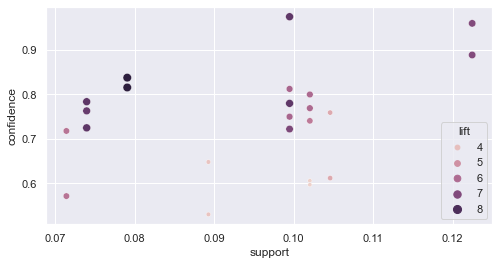

In [99]:
sns.scatterplot(x = "support", y = "confidence", size = "lift", data = rules, hue = "lift")
plt.show()

In [100]:
rules[ (rules['lift'] >= 6) & (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
16,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
18,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
19,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
20,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796
21,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850
22,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959


In [101]:
print("ALARM CLOCK BAKELIKE GREEN : ",basket_sets['ALARM CLOCK BAKELIKE GREEN'].sum())
print("ALARM CLOCK BAKELIKE RED : ",basket_sets['ALARM CLOCK BAKELIKE RED'].sum())

ALARM CLOCK BAKELIKE GREEN :  38
ALARM CLOCK BAKELIKE RED :  37


It means that people who buys 38 time item "ALARM CLOCK BAKELIKE GREEN" out of those 37 times item "ALARM CLOCK BAKELIKE RED" is bought, which is good recommendation.

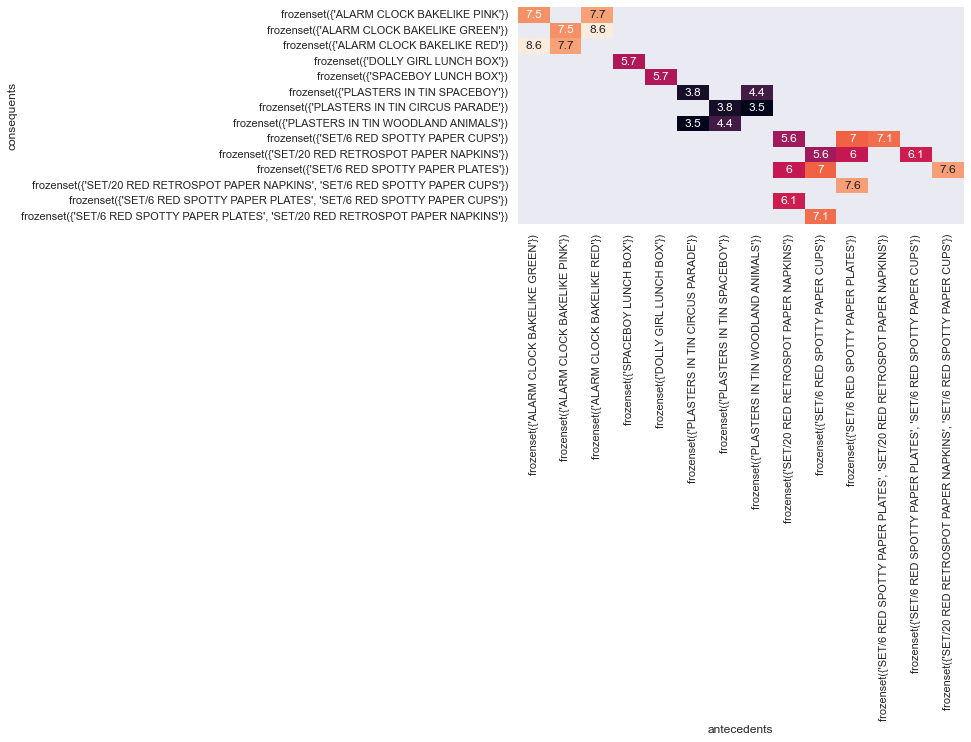

In [102]:
pivot = rules.pivot(index = 'consequents', columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off

sns.heatmap(pivot, annot = True, cbar=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

### Considering for Germany

In [126]:
basket2 = (dfm[dfm['Country'] =="Germany"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

In [127]:
basket2.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets2 = basket2.applymap(encode_units)
basket_sets2
basket_sets2.drop('POSTAGE', inplace=True, axis=1)

In [136]:
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
frequent_itemsets2

C:\Users\dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.065646,(CHARLOTTE BAG APPLES DESIGN)
3,0.050328,(CHILDRENS CUTLERY DOLLY GIRL)
4,0.061269,(COFFEE MUG APPLES DESIGN)
5,0.063457,(FAWN BLUE HOT WATER BOTTLE)
6,0.072210,(GUMBALL COAT RACK)
7,0.056893,(IVORY KITCHEN SCALES)
8,0.063457,(JAM JAR WITH PINK LID)
9,0.091904,(JAM MAKING SET PRINTED)


In [137]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.137856,0.115974,0.067834,0.492063,4.242887,0.051846,1.740427
1,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(PLASTERS IN TIN CIRCUS PARADE),0.157549,0.115974,0.050328,0.319444,2.754455,0.032057,1.298977
3,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF 4 FRUITS),0.115974,0.157549,0.050328,0.433962,2.754455,0.032057,1.488330
4,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.115974,0.245077,0.056893,0.490566,2.001685,0.028470,1.481887


In [142]:
print("ROUND SNACK BOXES SET OF4 WOODLAND : ",basket_sets2['ROUND SNACK BOXES SET OF4 WOODLAND'].sum())
print("SPACEBOY LUNCH BOX : ",basket_sets2['SPACEBOY LUNCH BOX'].sum())

ROUND SNACK BOXES SET OF4 WOODLAND :  112
SPACEBOY LUNCH BOX :  47


It means that people who buys 112 time item "ROUND SNACK BOXES SET OF4 WOODLAND" out of those only 47 times item "SPACEBOY LUNCH BOX" is bought

In [143]:
print("PLASTERS IN TIN CIRCUS PARADE : ",basket_sets2['PLASTERS IN TIN CIRCUS PARADE'].sum())
print("ROUND SNACK BOXES SET OF4 WOODLAND : ",basket_sets2['ROUND SNACK BOXES SET OF4 WOODLAND'].sum())

PLASTERS IN TIN CIRCUS PARADE :  53
ROUND SNACK BOXES SET OF4 WOODLAND :  112


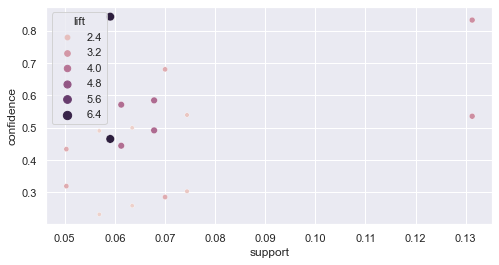

In [138]:
sns.scatterplot(x = "support", y = "confidence", size = "lift", data = rules2, hue = "lift")
plt.show()

In [140]:
rules2[(rules2['lift'] >= 4) & (rules2['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670
11,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746


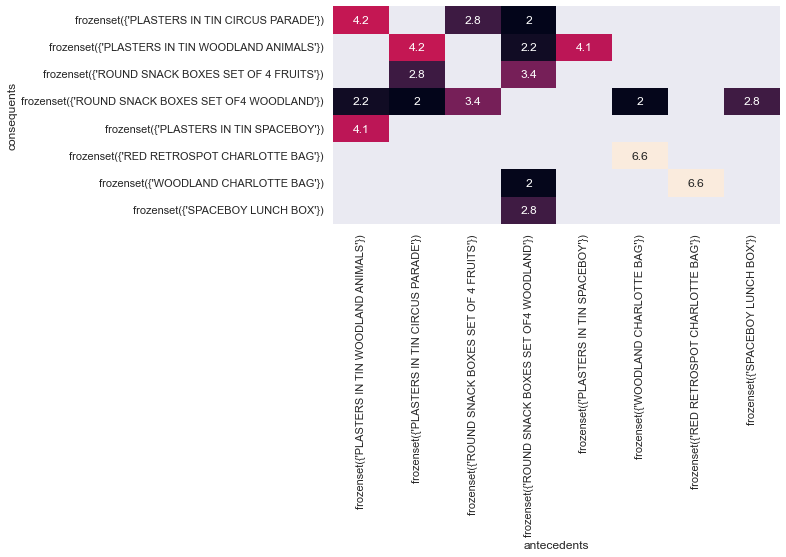

In [141]:
pivot2 = rules2.pivot(index = 'consequents', columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off

sns.heatmap(pivot2, annot = True, cbar=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()